# DAVID M. BOORE PAPER

This notebook, elaborated by Jordi Vendrell, contains the study of David M. Boore paper about "Orientation-Independent, Nongeometric-Mean Measures of Seismic Intensity from Two horitzontal Components of Motion".


## Exploratory data analysis

The data is extracted from PEER (Pacific Earthquake Engineering Research Center) Ground Motion Database. More concretely, from the Data source _NGA West 2 Database (Shallow Crustal Earthquakes in Active Tectonic Regimes)_.

Information of NGA West 2 project can be found at: [NGA West 2 database summary paper](http://www.m.w.daveboore.com/pubs_online/ngaw2_paper_ancheta_etal_database_eqs_2014.pdf), [NGA West 2 db presentation](https://peer.berkeley.edu/sites/default/files/ancheta_ngaw2_database.pdf), [Columns definition](./docs/peer-nga-west-2-flatfile-column-definition.pdf)

NGA West2 research program, coordinated by the Pacific Earthquake Engineering Research Center (PEER), has produced a database as an extension of the previous NGA West 1 version, and it contains worldwide ground motion data for earthquakes recorded from free measuring stations.

On the following table there is the difference between the both of NGA data:

<img src="./img/NGA_db_comparison.png" alt="NGA_db_comparison" width="350"/>

The database includes uniformly processed time series and response spectral ordinates for 111 periods ranging from 0.01 s to 20 s at 11 damping ratios from 0.5% to 30%. The values of spectral acceleration are in g units.

The data contains the median spectral accelerations over all orientations RotD50, and it can be used to develop Ground Motion Prediction Equations (GMPE).

[Shahi and Baker](https://www.jackwbaker.com/Publications/Shahi_Baker_(2014)_Directionality,_EQ_Spectra_preprint.pdf) describe how RotD50 can be adjusted to the maximum spectral acceleration RotD100, which some say it is more meaningful for structural design. RodD00 is the minimum spectral acceleration.

From [Shahi and Baker](https://www.jackwbaker.com/Publications/Shahi_Baker_(2014)_Directionality,_EQ_Spectra_preprint.pdf): "Structures in seismically active regions are generally designed considering ground motion in the horizontal plane. The spectral acceleration (Sa) value of a single component of a ground motion is defined as the maximum response of a single degree of freedom system with a specified period and damping (5% damping is assumed below, and Sa here refers to pseudo spectral acceleration). For a ground motion with shaking in multiple horizontal directions, some method is needed to combine the directionally-varying single-component Sa values into a single numerical value. Various methods have been proposed to compute a spectral acceleration value representative of the two-dimensional horizontal ground motion. These methods include using the geometric mean of the acceleration response spectra computed using two orthogonal components of ground motion and using the median or maximum value of response spectra over all orientations at each period (Boore et al., 2006; Boore, 2010)."

## SDOF system

- **Objective**: 
  - Making a simple SDOF model with 5% damping in Opensees.
  - Running one of the NGAWest2 ground motions (one component) to generate a response spectrum (_TABAS Spectra_)
  
- **1st step**: To have the ability to answer the following questions.
  - What is a SDOF model? How to make it in Opensees?
  - What is a response spectrum? How to generate it?
  - Curiosity: Why is 5% damping used?

- **FZ Example proposed for inspiration**:

  - Reference: https://openseespydoc.readthedocs.io/en/latest/src/exampleNamedSpacedNonlinearSDOF.html 
  - And read sections 1 and 3 from the book **Earthquake Dynamics of Structures** from the **Eartquake Engineering Research Institute EERI.**

- **JV Similar example for inspiration**: 

  - Reference: https://github.com/AmirHosseinNamadchi/OpenSeesPy-Examples/blob/master/Elastic%20Response%20Spectra.ipynb
  - **Problem**: SDOF system subject to El Centro ground acceleration $\ddot{u_g} (t)$.


## Theoretical background

### SDOF system

#### SDOF model

The complete equation of motion for a linear single degree of freedom system

$M·\ddot{U}(t)$ + $C·\dot{U}(t)$ + $K·U (t)$ = $-M·\ddot{u_g} (t)$ 

Where:
- $M$ is the mass matrix
- $C$ is the damping matrix
- $K$ is the stiffness matrix
- $\ddot{U}$ is the structural acceleration vector
- $\dot{U}$ is the structural velocity vector
- $U$ is the structural displacement vector
- $\ddot{u_g} (t)$  is the ground motion (the acceleration ground history)

<img src="./img/sdof.png" alt="sdof" width="250" style="float: left;"/>

#### Response spectrum

What is a response spectrum in eartquake engineering?

- Is a plot that contains the natural period T of the structure in X axis, and the maximum value of the magnitude (displacement, velocity or acceleration) per each natural period T in Y axis. This magnitude is called spectrum displacement, spectrum velocity or spectrum acceleration.

##### Steps to calculate this response spectrum:

1. Build the sdof system model equation of motion. With opensees:
- Define the geometry (nodes, elements --> stiffness)
- Define the masses
- Define boundary conditions
- Define damping

2. Solve the sdof system model equation of motion (with opensees for example) for specific period T (or frequency).
   The solution gives, for each node, the temporal behavior:
  - Displacement $U$
  - Velocity $\dot{U}$
  - Acceleration $\ddot{U}$

3. To have the frequency analysis, we pick the maximum of those values and we repeat the steps 1,2 and 3 for different period T values.

4. After repeating the process, we can plot for all the T period analyzed, which is the maximum $U$, $\dot{U}$, $\ddot{U}$ and this is the frequency response of the system.

## Simulation process

### Required modules
Here there is the import of all required modules in this code.  <font color='red'>**_MODIFICAR-HO_**</font>

In [1]:
import openseespy.opensees as ops  # Opensees
import os  # to read files
import math
import numpy as np  #  multidimensional array and matrix data structures
import matplotlib.pyplot as plt  # to plot the data

### Tabas data extraction from NGA-West2

Here there is the explication and code lines on how to extract the file data necessary to elaborate the RotD50 Response spectra of Tabas Earthquake.

From the Earthquake data (the flatfiles) it is known that the Tabas Eartquake in Iran recorded at 1978 at Tabas Station is the Record Sequence number 143 (RSN). With this number it is possible to extract the Ground Motion Data of this Earthquake.

9 different files are obtained. For each direction (horizontal and transversal in x-y plane, and vertical) can be obtained the data from acceleration, displacement and velocity.

In this code only the x (horizontal) and y (transversal) axis directions are of interest. Because with these two directions and their respective Ground Motion Data, and with $\theta$ angle, the important Ground Motion input can be obtained.

<img src="./img/2dim.png" alt="2dim" width="350" style="float: left;"/>

And with this the RotD50 Response Spectra can be ploted. 

<img src="./img/rotd50.png" alt="rotd50" width="350" style="float: left;"/>

#### _Explore ground motion data_

In [2]:
#Define the path of the NGA-West2 files used
GMD_Xaxis_Horizontal = './nga_west2_db/tabas_RSN_143/RSN143_TABAS_TAB-L1.AT2'
GMD_Yaxis_Transversal = './nga_west2_db/tabas_RSN_143/RSN143_TABAS_TAB-T1.AT2'

In [3]:
#Read the Ground Motion Data in the NGA-West2 files used
# source: https://www.pythonforbeginners.com/files/with-statement-in-python
def read_NGAWest2_files(filepath):  
    with open (filepath, "r") as GMfile:
        #put all the lines into a list
        data = GMfile.read().splitlines()
        
        #pick information from line 4 (there is the number of points and the df time differential)
        sp = data[3].split(' ')
        numPts = int(sp[3].split(',')[0])
        dt = float(sp[7])
        
        #remove headlines
        headlines = 4
        data = data[headlines:len(data)]
        
        #put acceleration data into list
        data = list(map(str.strip, data))
        data = list(map(str.split, data))
        gm = []
        for i in range(len(data)):
            for ind in range(len(data[i])):
                gm.append(float(data[i][ind]))
        
        return dt, numPts, np.array(gm)
            


In [4]:
dt1, numPts1, gmdata1 = read_NGAWest2_files(GMD_Xaxis_Horizontal)
dt2, numPts2, gmdata2 = read_NGAWest2_files(GMD_Yaxis_Transversal)

In [5]:
time1 = np.linspace(0.0, numPts1*dt1, numPts1, endpoint=True)
time2 = np.linspace(0.0, numPts2*dt2, numPts2, endpoint=True)

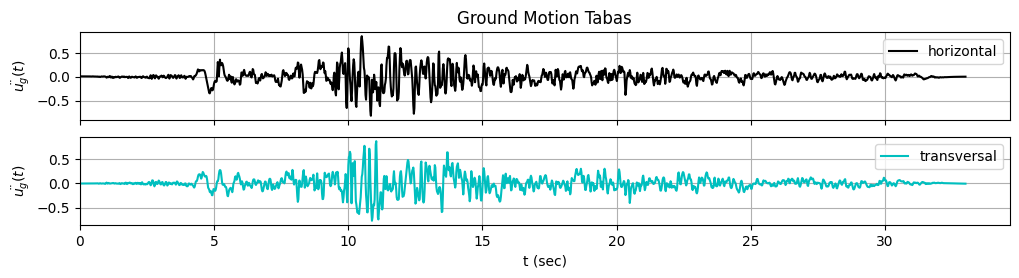

In [6]:
plt.figure(figsize=(12,2.5)) #select the visualization size of the plot
ax1=plt.subplot(211)
plt.setp(ax1.get_xticklabels(),visible=False)
plt.plot(time1, gmdata1, color='k', label='horizontal')
plt.ylabel('$\ddot{u_g} (t)$')
plt.title('Ground Motion Tabas')
plt.grid()
plt.xlim(left=0)
plt.legend()

plt.subplot(212,sharex=ax1)
plt.plot(time2, gmdata2, color='c', label='transversal')
plt.ylabel('$\ddot{u_g} (t)$')
plt.xlabel('t (sec)')
plt.grid()
plt.xlim(left=0)
plt.legend()
plt.show()

#### _Find the combinational direction of Horitzontal Ground Motion + Transversal Ground Motion_

In [7]:
def create_aROT(aX, aY, theta):
    """
    Create a_ROT
    
    Parameters
    ------------
    aX : np.array
        horizontal acceleration
    aY : np.array
        transversal acceleration
    theta : int
        angle
    
    Returns
    -------
    np.array
        list of a_ROT
    """
    a_ROT = aX*math.cos(theta) + aY*math.sin(theta)
    return a_ROT

In [8]:
d_theta = 1
initial_v = 0
final_v = 180 #degrees
N = (final_v - initial_v) / d_theta
theta_list = np.linspace(initial_v, final_v, num = int(N+1), endpoint=True)

#### _Define and solve the Lollipop system_

In [9]:
# Model definition
node_bottom=1
node_top=2
def model_definition(stiffness, alpha_m):
    ops.model('basic', '-ndm', 1, '-ndf', 1)
    ops.node(node_bottom, 0.0)
    ops.node(node_top, 0.0)
    ops.uniaxialMaterial('Elastic', 1, stiffness)
    ops.element('zeroLength', 1, *[node_bottom, node_top], '-mat', 1, '-dir', 1)
    ops.mass(2, 1.0)
    ops.rayleigh(alpha_m, 0, 0, 0)
    ops.fix(node_bottom, 1)    

In [10]:
# Data recorder



In [11]:
# analysis definition
dt = 0.02 # is like the precision of the time series
def define_analysis(a_ROT, time):
    g = 981
    ops.timeSeries('Path', 1,
               '-dt', dt,
               '-values', *a_ROT*g,
               '-time', *time) # Multiply the ground acceleration by gravity
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1)
    ops.constraints('Transformation')
    ops.numberer('Plain')
    ops.system('ProfileSPD')
    ops.algorithm('Linear', False, False, True)
    ops.integrator('Newmark', 0.5, 0.25)
    ops.analysis('Transient')    

In [12]:
# Solve system
def solve_system(period, damping, a_ROT, time, analysis_dt):
    
    omega = (2*np.pi)/period 
    stiffness = omega**2 
    alpha_m = 2*damping*omega 
    
    ops.wipe()
    
    # Model Definition
    model_definition(stiffness,alpha_m)
        
    # Analysis Definition
    define_analysis(a_ROT, time)
        
    outputs = {
        'displacement':[],
        'velocity':[], 
        'acceleration':[]
    }
    
    # Solve system
    analysis_time = time[-1]
    while ops.getTime() < analysis_time:
        ops.analyze(1, analysis_dt)
        outputs['displacement'].append(ops.nodeDisp(node_top, 1))
        outputs['velocity'].append(ops.nodeVel(node_top, 1))
        outputs['acceleration'].append(ops.nodeAccel(node_top, 1))    
        
    return outputs

In [27]:
# Obtain ROTD50 function

def get_ROTD50(period, damping, a_ROT, time, analysis_dt):
    # calculate node 2 acceleration
    results = solve_system(period, damping, a_ROT, time, analysis_dt)
    acc = results['displacement']
    acc = np.array(acc)
    ROTD50 = np.median(np.abs(acc))
    return ROTD50

def get_ROTD100(period, damping, a_ROT, time, analysis_dt):
    # calculate node 2 acceleration
    results = solve_system(period, damping, a_ROT, time, analysis_dt)
    acc = results['displacement']
    acc = np.array(acc)
    ROTD100 = np.max(np.abs(acc))
    return ROTD100

In [28]:
# Get ROTD50 per each rotation angle

period = 1.64
damping = 0.05
time = time1
analysis_dt = dt1
rotd100_list = []
for i in range(len(theta_list)):
    a_ROT = create_aROT(gmdata1, gmdata2, theta_list[i])
    rotd100_theta = get_ROTD100(period, damping, a_ROT, time, analysis_dt)
    rotd100_list.append(rotd100_theta)

rotd100_list = np.array(rotd100_list)

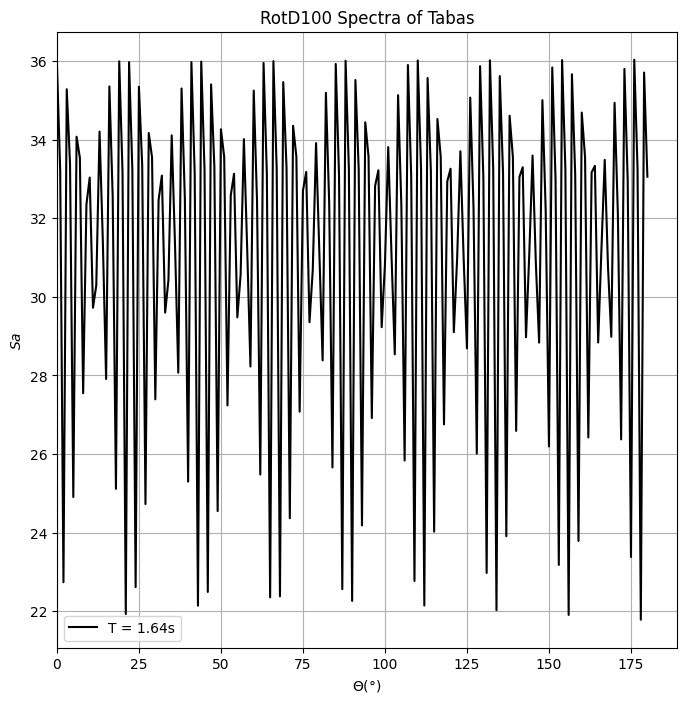

In [29]:
# RotD50 Spectra of Tabas

plt.figure(figsize=(8,8)) #select the visualization size of the plot
plt.plot(theta_list, rotd100_list, color='k', label='T = 1.64s')
plt.ylabel('$Sa$')
plt.xlabel('$\Theta (\degree) $')
plt.title('RotD100 Spectra of Tabas')
plt.grid()
plt.xlim(left=0)
plt.legend()
plt.show()

In [37]:
# Get ROTD50 response spectra

period = 1.64
damping = 0.05
time = time1
analysis_dt = dt1

periods = np.linspace(0.001, 10, 500, endpoint=True)

rotd50_list = []
for i in range(len(periods)):
    a_ROT = create_aROT(gmdata1, gmdata2, theta_list[90])
    rotd50_theta = get_ROTD50(periods[i], damping, a_ROT, time, analysis_dt)
    rotd50_list.append(rotd50_theta)

rotd50_list = np.array(rotd50_list)

rotd100_list = []
for i in range(len(periods)):
    a_ROT = create_aROT(gmdata1, gmdata2, theta_list[90])
    rotd100_theta = get_ROTD100(periods[i], damping, a_ROT, time, analysis_dt)
    rotd100_list.append(rotd100_theta)

rotd100_list = np.array(rotd100_list)

horizontal_list = []
for i in range(len(periods)):
    horitzontal_theta = get_ROTD100(periods[i], damping, gmdata1, time, analysis_dt)
    horizontal_list.append(horitzontal_theta)

horizontal_list = np.array(horizontal_list)

transverse_list = []
for i in range(len(periods)):
    transverse_theta = get_ROTD100(periods[i], damping, gmdata2, time, analysis_dt)
    transverse_list.append(transverse_theta)

transverse_list = np.array(transverse_list)

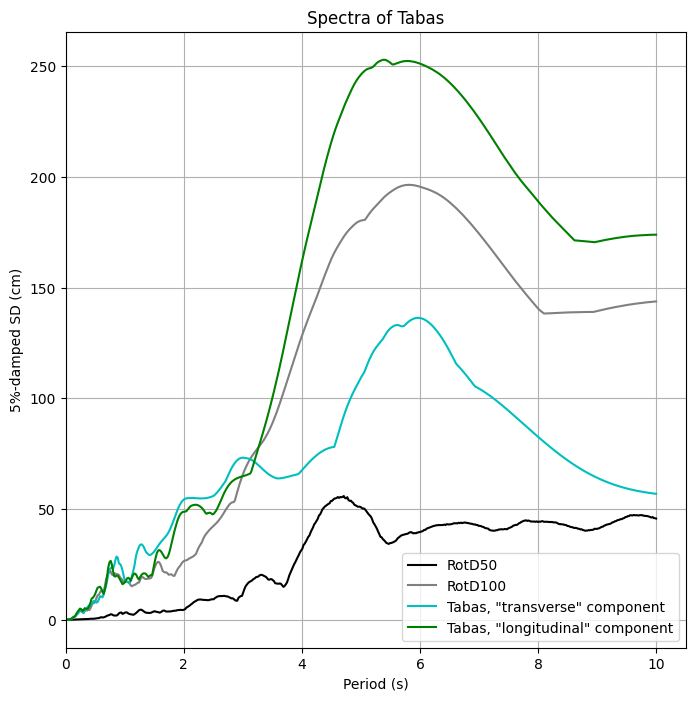

In [39]:
plt.figure(figsize=(8,8)) #select the visualization size of the plot
plt.plot(periods, rotd50_list, color='k', label='RotD50')
plt.plot(periods, rotd100_list, color='grey', label='RotD100')
plt.plot(periods, horizontal_list, color='c', label='Tabas, "transverse" component')
plt.plot(periods, transverse_list, color='g', label='Tabas, "longitudinal" component')
plt.ylabel('5%-damped SD (cm)')
plt.xlabel('Period (s)')
plt.title('Spectra of Tabas')
plt.grid()
plt.xlim(left=0)
plt.legend()
plt.show()